In [1]:
import os, sys, glob, random, cv2
import matplotlib.pyplot as plt
from pathlib import Path
DATA_DIR = Path("../data/processed/stage2_enumeration")
IMAGE_DIR= DATA_DIR / "images/train"
LABEL_DIR =DATA_DIR / "labels/train"

CLASS_NAME = {  
  0 : "Incisor",
  1 : "Canine",
  2 : "Premolar",
  3 : "Molar"}

COLORS = {
    0 : (255, 0, 0), #red
    1 : (0, 255, 0), #green
    2 : (0, 0, 255), #blue
    3 : (255, 255, 0) #yellow
}
%matplotlib inline

all train image :  1708


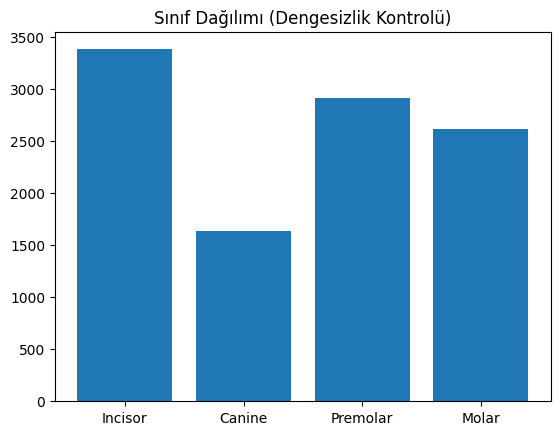

In [2]:
#find name txt
label_file = list(LABEL_DIR.glob("*.txt"))
counts = {0: 0, 1: 0, 2: 0, 3: 0}
for lf in label_file:
    with open(lf, 'r') as f:
        for line in f:
            c_id = int(line.split()[0])
            if c_id in counts:
                counts[c_id] += 1
print(f"all train image :  {len(label_file)}")


plt.bar([CLASS_NAME[k] for k in counts], counts.values())
plt.title("Sınıf Dağılımı (Dengesizlik Kontrolü)")
plt.show()

In [3]:
def visualize_sample (image_file, label_file):

    #BGR -> RGB
    img = cv2.imread(str(image_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape # find pixel

    with open(label_file, 'r')as f:
        lines = f.readlines()

    for line in lines:

        parts = line.strip().split() # "0 x y w h" → ['0','x','y','w','h']


        #normalized value * pixel
        x_center = float(parts[1]) * w
        y_center = float(parts[2]) * h
        box_w    = float(parts[3]) * w
        box_h    = float(parts[4]) * h

        #normalized cv2 form
        x1 = int(x_center-box_w / 2)
        x2 = int(x_center+box_w / 2)
        y1 = int(y_center-box_h / 2)
        y2 = int(y_center+box_h / 2)

        class_id =int(parts[0])
        color = COLORS[class_id]
        name = CLASS_NAME[class_id]

        #drwa box
        cv2.rectangle(img, (x1,y1), (x2,y2), color, 3)

        # box text name
        cv2.putText(img, name, (x1,y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    2, color, 4)
    return img

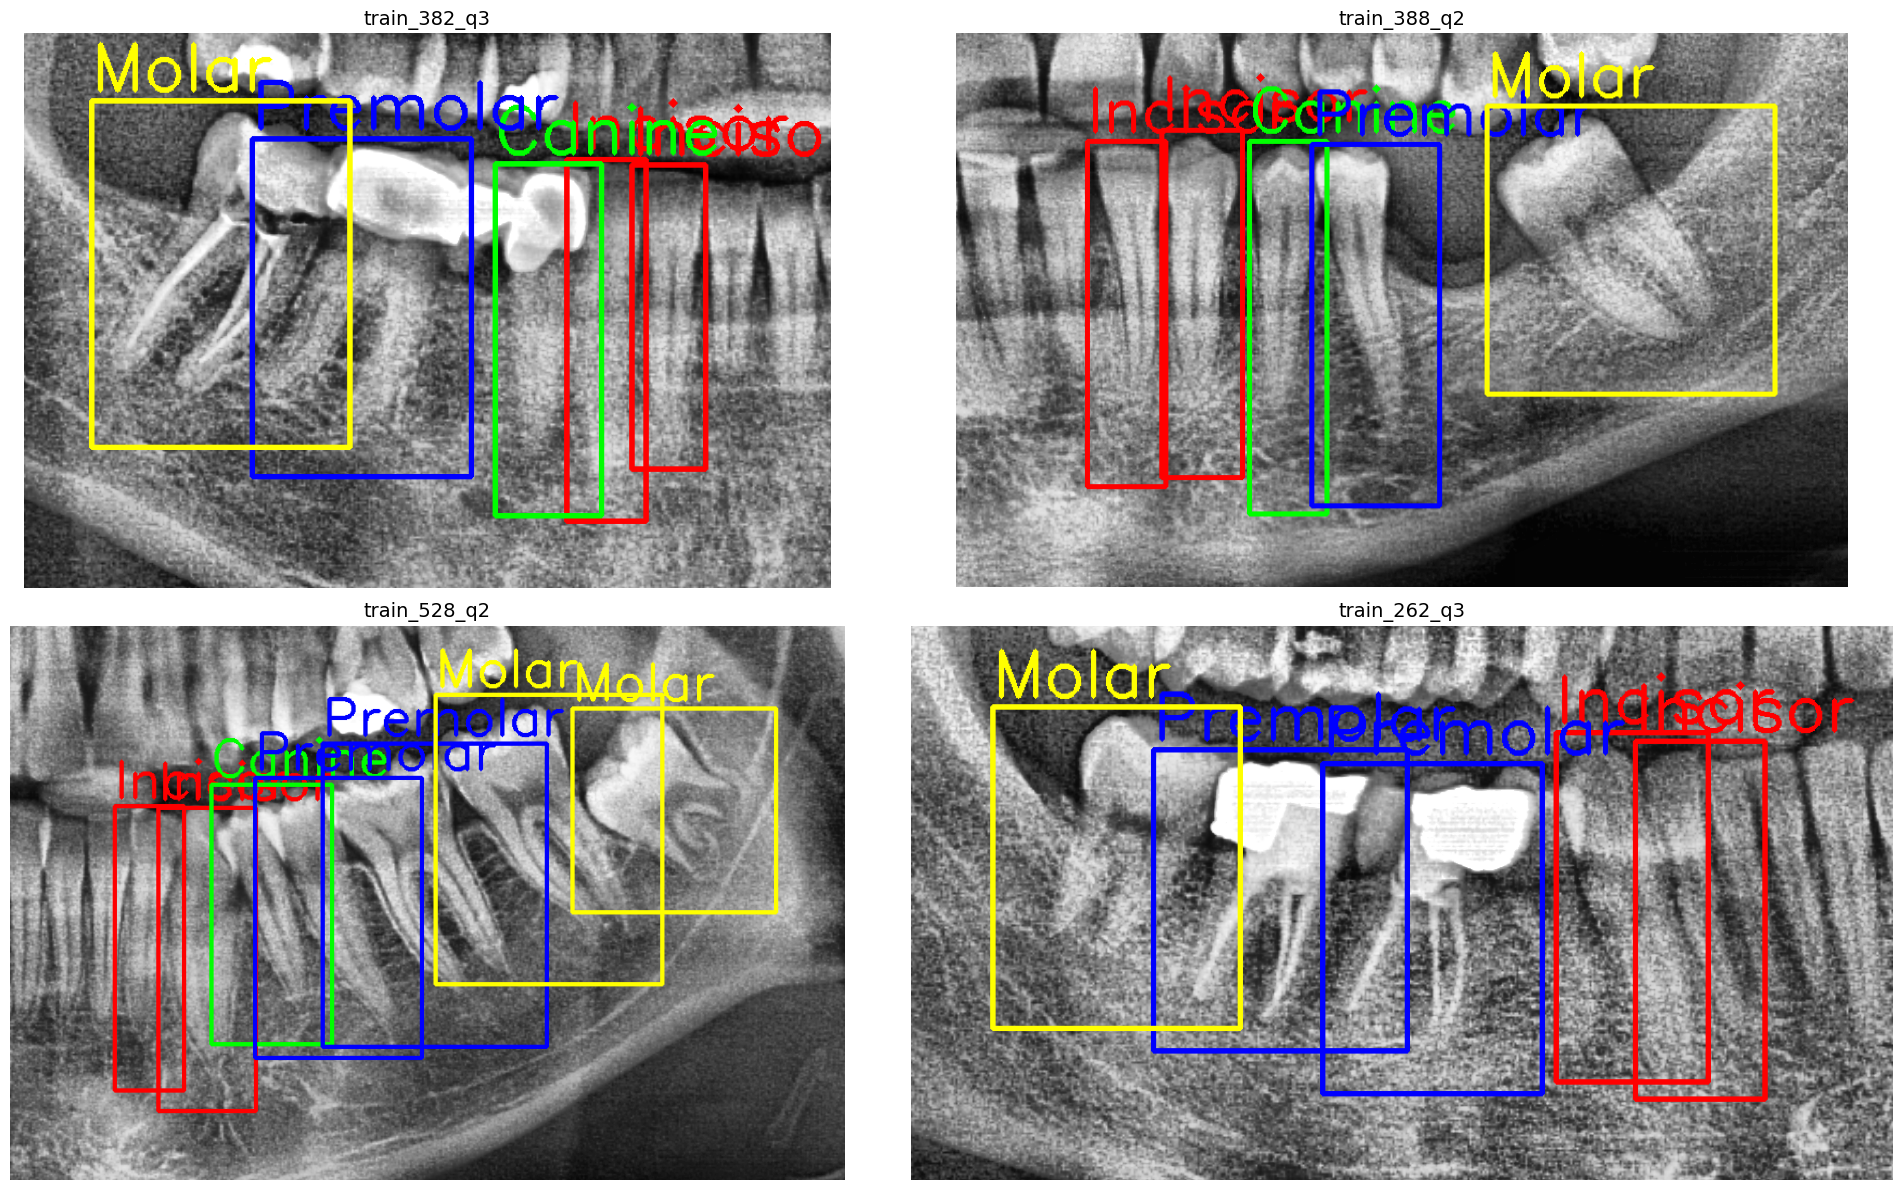

In [10]:
#choose random 4 png
random_png = random.sample(label_file, 4)
plt.figure(figsize= (20 ,12))

for i, LABEL_DIR in enumerate(random_png):
    image_paths = IMAGE_DIR / f"{LABEL_DIR.stem}.png"
    if image_paths.exists():
        result_img = visualize_sample(image_paths, LABEL_DIR)
        
        plt.subplot(2, 2, i + 1)
        plt.imshow(result_img)
        plt.axis('off')
        plt.title(f"{LABEL_DIR.stem}", fontsize=14)
    else:
        print("img file does not exist")
plt.tight_layout()
plt.show()